<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Covid Vaccination</h3>
</div>

<img src = "https://www.eesc.europa.eu/sites/default/files/styles/large/public/images/shutterstock_1642888921.jpg?itok=P9-6YhGd" width=50%>

--------------------------------------------------------------------------

## Importing the libraries

In [308]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from prophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Load and Prepare Data

In [311]:
cv = pd.read_csv("country_vaccinations.csv")

# Exploratory Data Analysis 

In [314]:
cv.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [316]:
cv.shape

(31240, 15)

In [318]:
cv.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [320]:
# countries 
cv["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fal

In [322]:
cv["country"].unique().size

218

In [324]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31240 entries, 0 to 31239
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   iso_code                             31240 non-null  object 
 2   date                                 31240 non-null  object 
 3   total_vaccinations                   17451 non-null  float64
 4   people_vaccinated                    16554 non-null  float64
 5   people_fully_vaccinated              13795 non-null  float64
 6   daily_vaccinations_raw               14421 non-null  float64
 7   daily_vaccinations                   30948 non-null  float64
 8   total_vaccinations_per_hundred       17451 non-null  float64
 9   people_vaccinated_per_hundred        16554 non-null  float64
 10  people_fully_vaccinated_per_hundred  13795 non-null  float64
 11  daily_vaccinations_per_milli

In [326]:
# the number of nulls in each column
cv.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

## Data Preprocessing

In [329]:
# the columns "source_name" and "source_website" are not included
df = cv.iloc[:, :-2]

# the column "iso_code" is dropped
df.drop(["iso_code"], axis = 1, inplace=True)

In [331]:
df["vaccines"].unique()

array(['Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech', 'Oxford/AstraZeneca',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinovac, Sputnik V', 'Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinovac', 'Moderna, Pfizer/BioNTech',
       'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Covaxin, Oxford/AstraZeneca', 'Sinopharm/Beijing',
       '

In [333]:
# One-hot 

# vaccines are splitted by comma  
df["vaccines"] = df["vaccines"].str.split(", ")

# vaccinesSet is the set of all vaccines
vaccinesSet = set() 
for i in range(0, df.shape[0]):
        vaccinesSet = vaccinesSet.union(set(df["vaccines"][i]))
                
# for each vaccine, one column is added
new_columns = list(df.columns)
for i in range(0, len(vaccinesSet)):
    new_columns.append(list(vaccinesSet)[i])
    
# the columns of vaccines are filled with 0
df = df.reindex(columns= new_columns, fill_value=0)

# For each entry, the columns related to the used vaccines are filled with 1
for i in range(0, df.shape[0]):
    df.loc[i,df["vaccines"][i]] = 1
    
# Finally, the "vaccines" columns is dropped. It is replaced by One-hot encoded columns  
df.drop("vaccines", axis = 1, inplace=True)

In [335]:
# Convert 'date' column to datetime if not already in datetime format
df["date"] = pd.to_datetime(df["date"])

# Set 'date' column as the DataFrame index
df.set_index('date', inplace=True)  

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31240 entries, 2021-02-22 to 2021-07-15
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31240 non-null  object 
 1   total_vaccinations                   17451 non-null  float64
 2   people_vaccinated                    16554 non-null  float64
 3   people_fully_vaccinated              13795 non-null  float64
 4   daily_vaccinations_raw               14421 non-null  float64
 5   daily_vaccinations                   30948 non-null  float64
 6   total_vaccinations_per_hundred       17451 non-null  float64
 7   people_vaccinated_per_hundred        16554 non-null  float64
 8   people_fully_vaccinated_per_hundred  13795 non-null  float64
 9   daily_vaccinations_per_million       30948 non-null  float64
 10  Pfizer/BioNTech                      31240 non-null  int64  
 11  Sputnik V  

In [339]:
# the number of nulls in different columns
df.isnull().sum()

country                                    0
total_vaccinations                     13789
people_vaccinated                      14686
people_fully_vaccinated                17445
daily_vaccinations_raw                 16819
daily_vaccinations                       292
total_vaccinations_per_hundred         13789
people_vaccinated_per_hundred          14686
people_fully_vaccinated_per_hundred    17445
daily_vaccinations_per_million           292
Pfizer/BioNTech                            0
Sputnik V                                  0
Soberana02                                 0
EpiVacCorona                               0
RBD-Dimer                                  0
Oxford/AstraZeneca                         0
Sinopharm/Beijing                          0
Sinopharm/HayatVax                         0
Abdala                                     0
Sinopharm/Wuhan                            0
Covaxin                                    0
Sinovac                                    0
Moderna   

## Visualization

In [342]:
# data of "Iran" and "United States" are considered

IRI_df = cv.loc[cv["country"] == "Iran"]

USA_df = cv.loc[cv["country"] == "United States"]

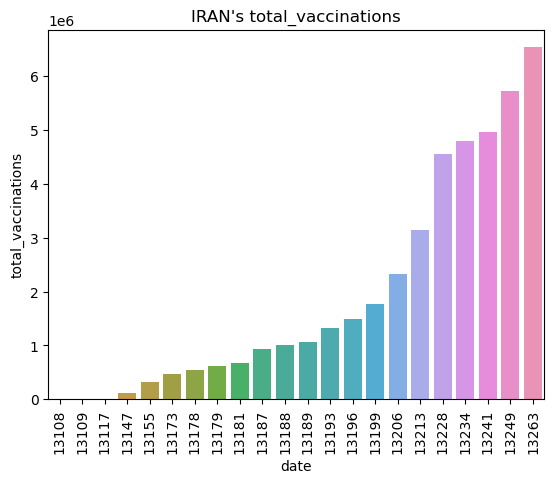

In [344]:
# the trend of total vaccination in IRAN

IRI_df_cleaned = IRI_df.dropna(subset=["total_vaccinations"], axis=0)

ax = sns.barplot(x = IRI_df_cleaned.index, y = IRI_df_cleaned.total_vaccinations)
plt.xlabel("date")
plt.ylabel("total_vaccinations")
plt.title("IRAN's total_vaccinations")
plt.xticks(rotation=90)
plt.show()

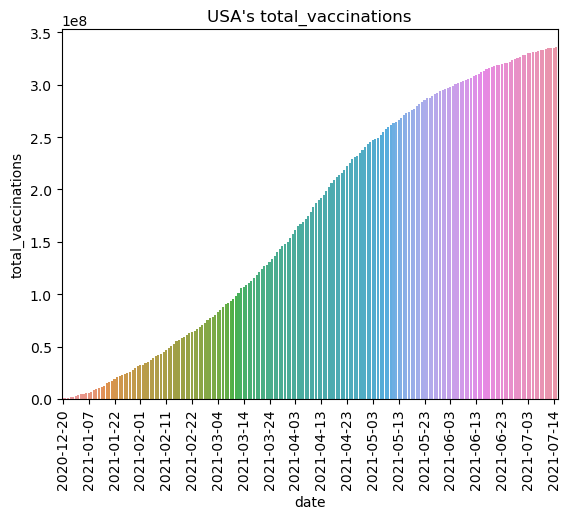

In [346]:
# the trend of total vaccination in USA

USA_df_cleaned = USA_df.dropna(subset=["total_vaccinations"], axis=0)

# Create the bar plot
ax = sns.barplot(data=USA_df_cleaned, x="date", y="total_vaccinations")

# Customize the plot
plt.ylabel("total_vaccinations")
plt.title("USA's total_vaccinations")
plt.xlabel("date")

# Extract unique dates from the "date" column of USA_df
xticks = USA_df.dropna(subset = ["total_vaccinations"], axis=0)["date"].unique()

# Set xticks based on the unique dates
xticks_to_display = range(0, len(xticks), 10)
ax.set_xticks(xticks_to_display)
ax.set_xticklabels([xticks[i] for i in xticks_to_display], rotation=90)

plt.show()

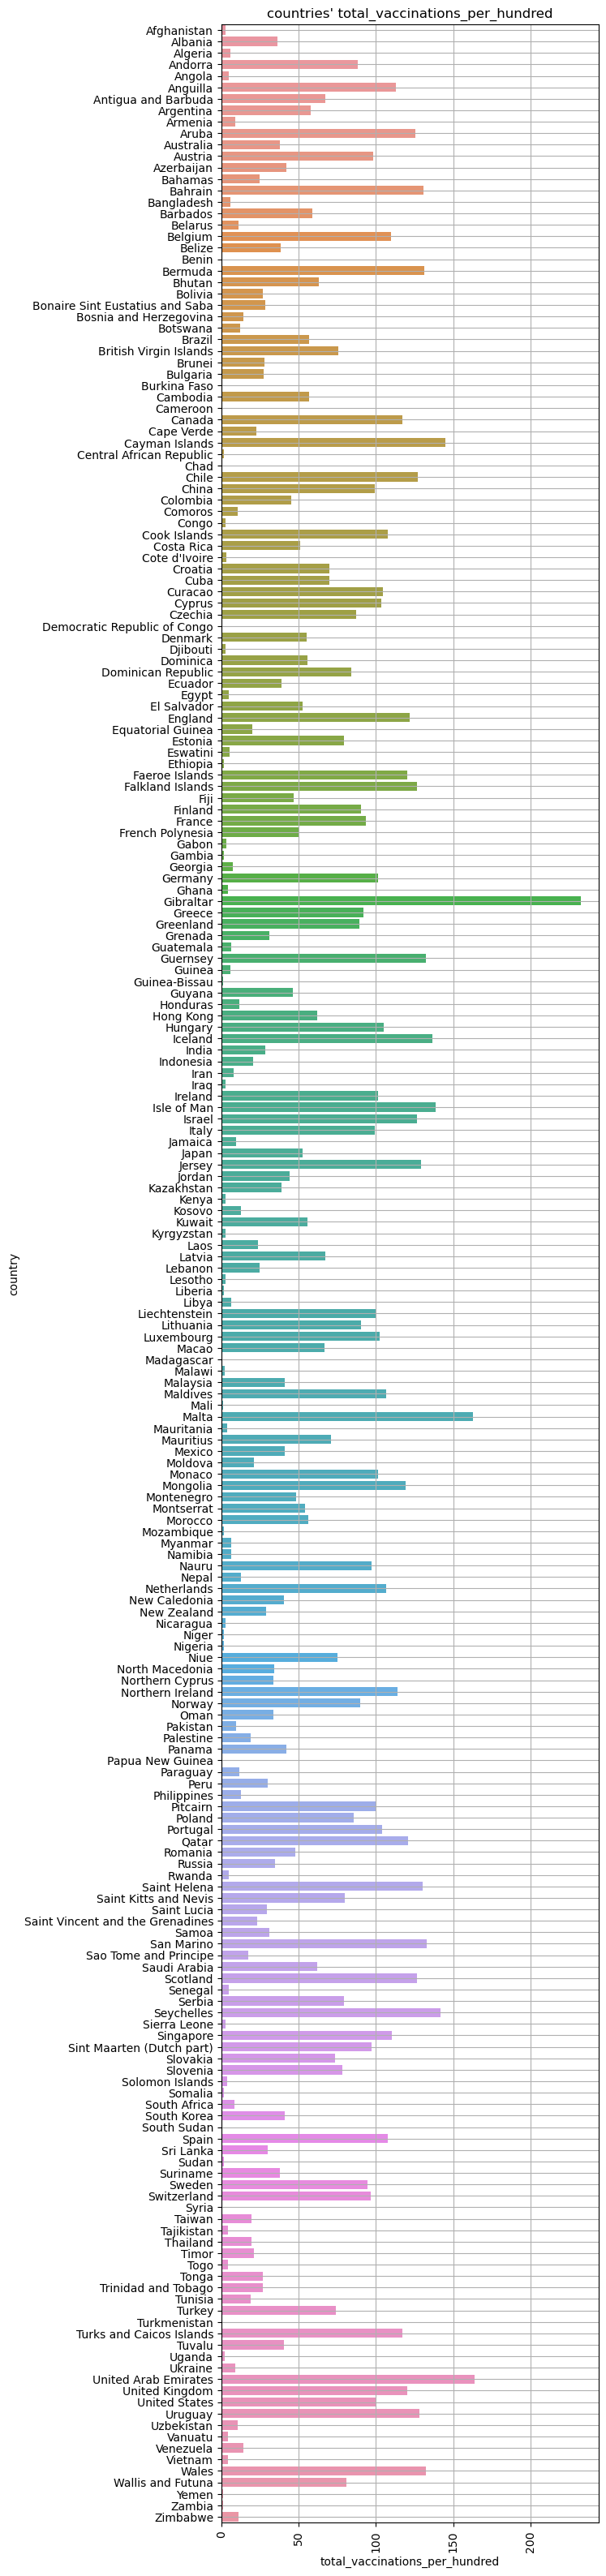

In [348]:
tv = pd.DataFrame()  # Create an empty DataFrame to store the selected rows
k = 0
for i in cv["country"].unique():
    selected_row = cv.loc[cv["country"] == i].dropna(subset=["total_vaccinations_per_hundred"], axis=0).iloc[-1, :]
    tv = pd.concat([tv, selected_row.to_frame().T], ignore_index=True)  # Append the selected row to the new DataFrame tv
    k += 1
    
    

plt.figure(figsize=(6, 40))
sns.barplot(tv, y = "country", x = "total_vaccinations_per_hundred")
plt.xlabel("total_vaccinations_per_hundred")
plt.title("countries' total_vaccinations_per_hundred")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


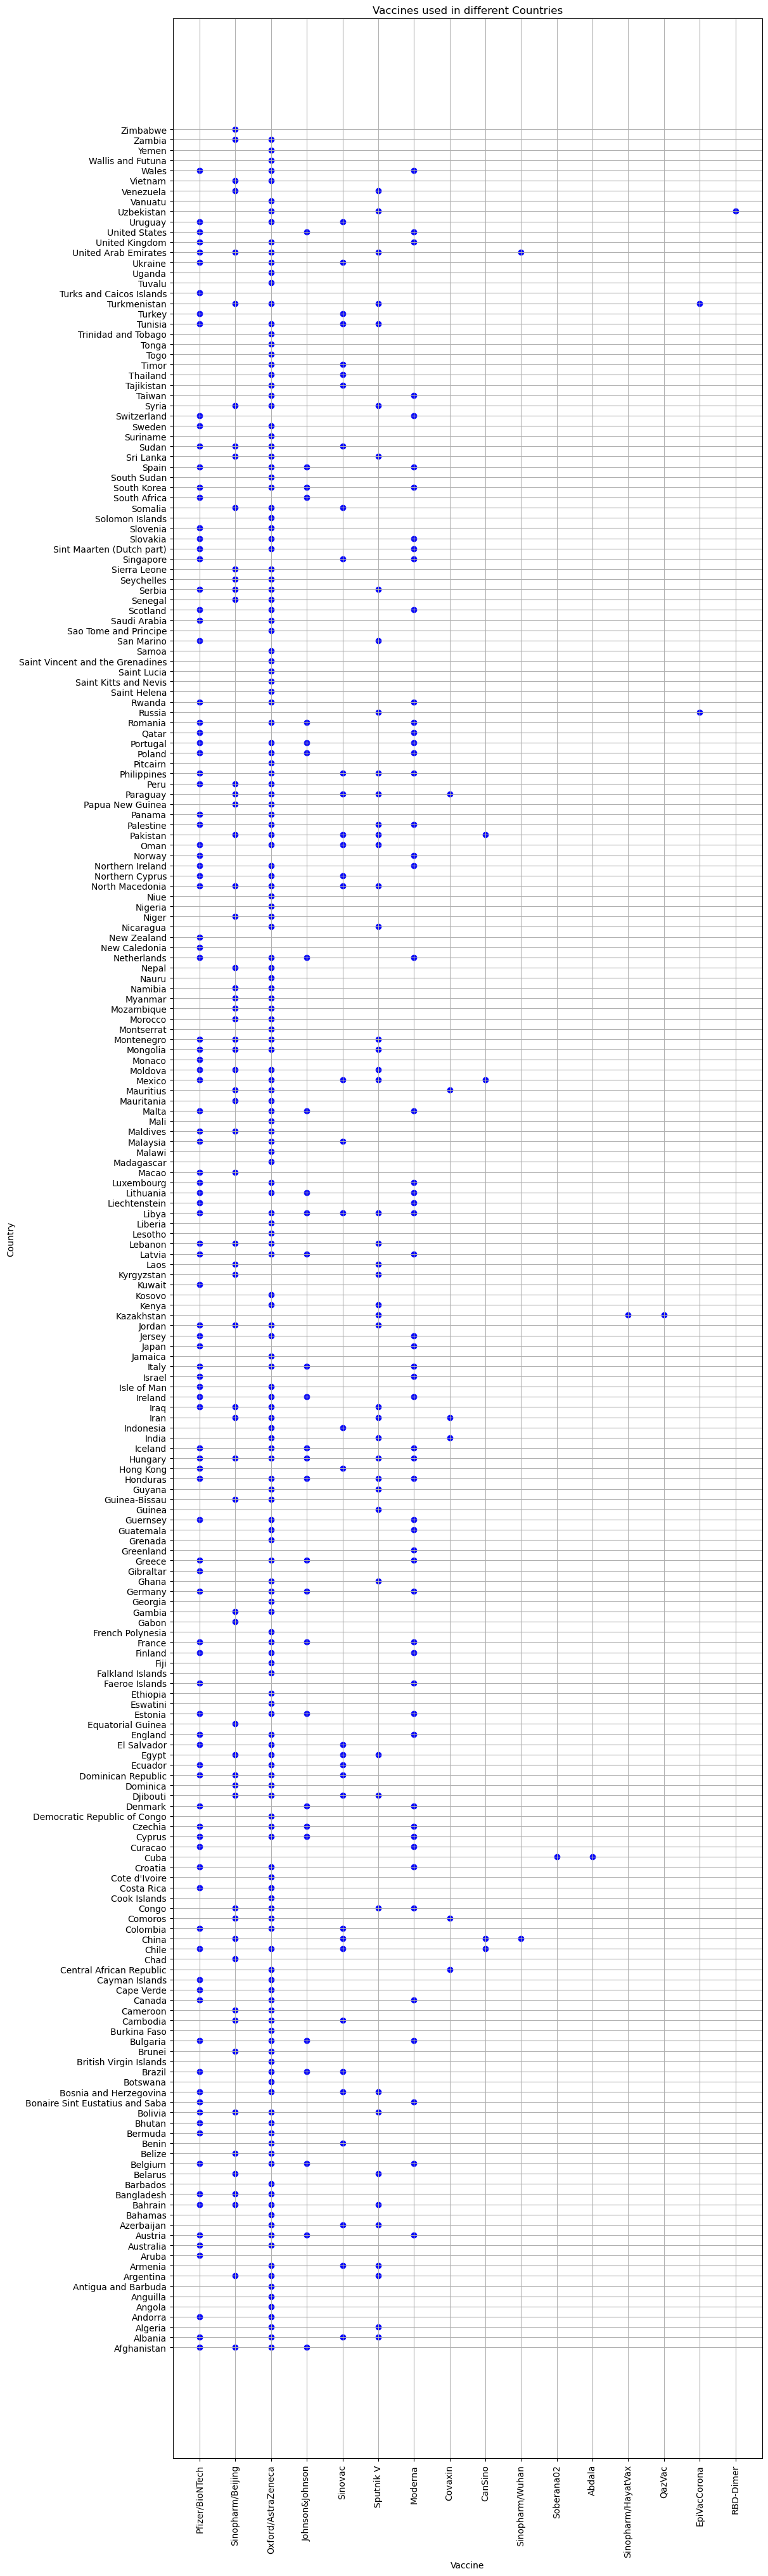

In [350]:
vaccines = ['RBD-Dimer', 'Pfizer/BioNTech',
       'Sinopharm/Beijing', 'CanSino', 'Oxford/AstraZeneca',
       'Sinopharm/HayatVax', 'Soberana02', 'Johnson&Johnson', 'Sinovac',
       'QazVac', 'EpiVacCorona', 'Abdala', 'Moderna', 'Covaxin',
       'Sinopharm/Wuhan', 'Sputnik V']

x = []
y = []
for country in df.country.unique():
    temp = df.loc[df["country"] == country][vaccines].iloc[-1,:]
    for i in range(0,len(temp)):
        if temp[i] == 1:
            x.append(country)
            y.append(temp.index[i])
            
            
# Create a scatter plot
plt.figure(figsize=(12, 50))
plt.scatter(y, x, color='blue', marker='o')

# Set labels and title
plt.xlabel('Vaccine')
plt.ylabel('Country')
plt.title('Vaccines used in different Countries')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)
plt.grid()
plt.show()


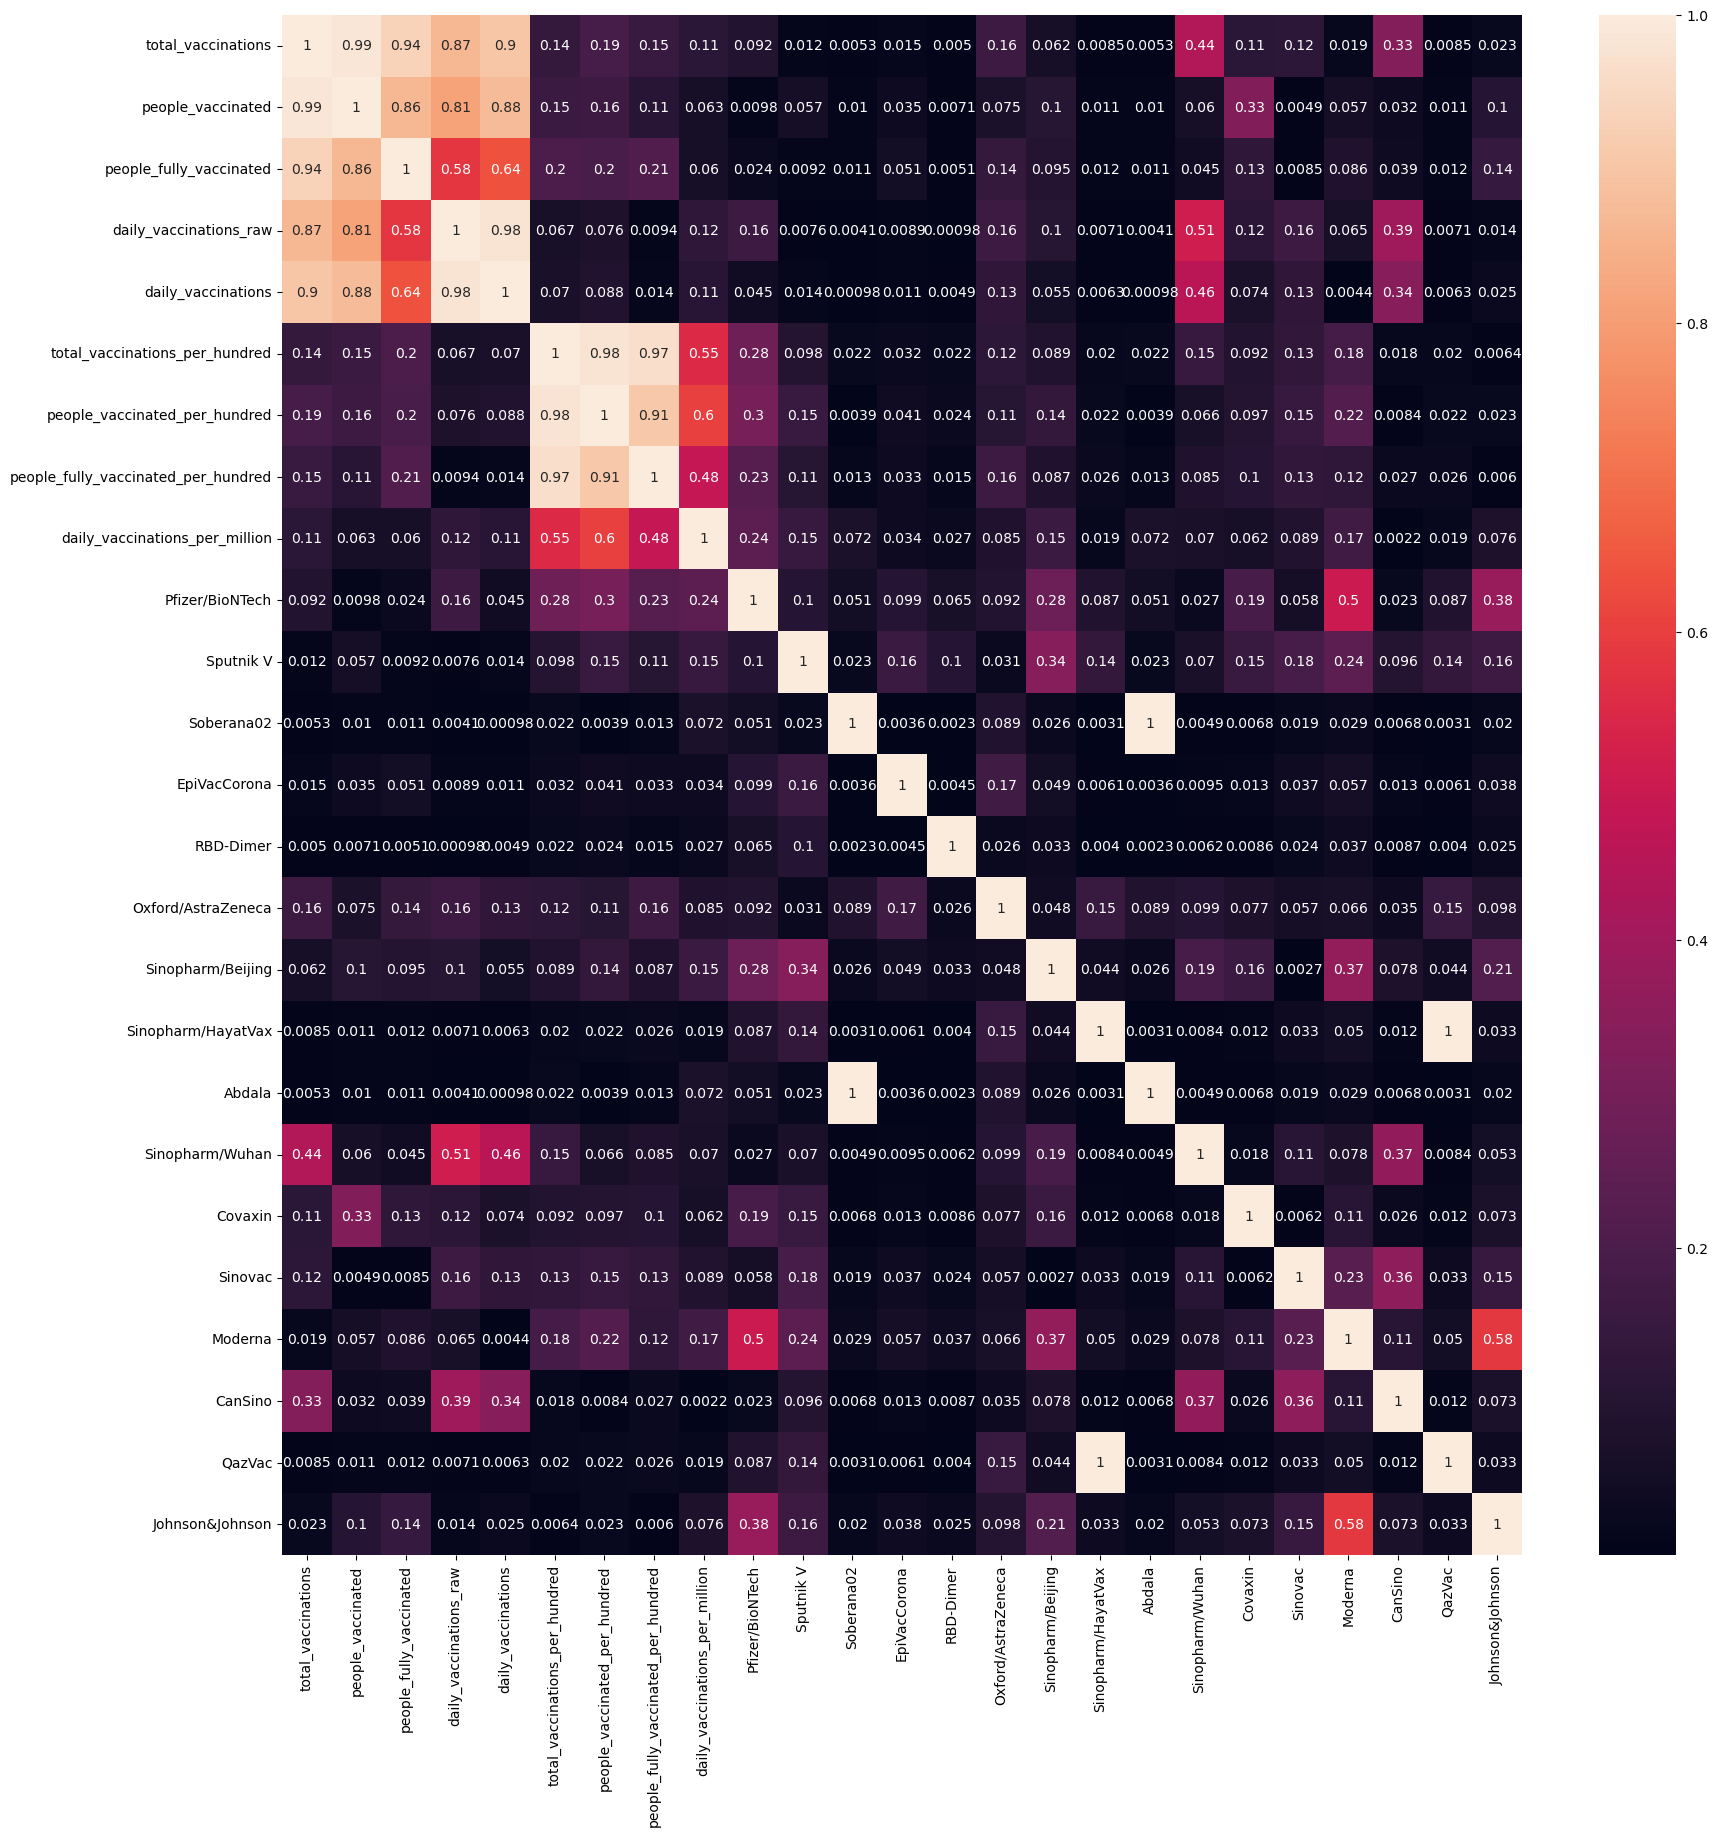

In [354]:
# correlation between features
corr = df.corr(numeric_only=True)
plt.figure(figsize=(20,20))
sns.heatmap(abs(corr), annot=True, annot_kws={"size":10})
plt.show()

# Preprocessing

#### Data

In [358]:
# the specific country is set to Iran
specific_country = "Iran"

# DataFrame of the specific country 
df_specific_country = df.loc[df["country"] == specific_country, :].copy()

### Handle missing values

In [361]:
# Drop rows in 'df_specific_country' with missing values in 'daily_vaccinations'
df_specific_country.dropna(subset=['daily_vaccinations'], inplace=True)


# fill missing values Using interpolation 
df_specific_country['total_vaccinations'].interpolate(method= "values", inplace=True)

# Drop rows with missing values after interpolation
df_specific_country.dropna(subset=['total_vaccinations'], inplace=True)

# fill missing values Using interpolation 
df_specific_country['people_vaccinated'].interpolate(method= "values", inplace=True)
df_specific_country['people_fully_vaccinated'].interpolate(method= "values", inplace=True)
df_specific_country['daily_vaccinations_raw'].interpolate(method= "values", inplace=True)

# Drop rows with missing values after interpolation
df_specific_country.dropna(subset=["people_vaccinated"], axis= 0, inplace=True)
df_specific_country.dropna(subset=["people_fully_vaccinated"], axis= 0, inplace=True)
df_specific_country.dropna(subset = ['daily_vaccinations_raw'], inplace=True)

# since there are too many nans in columns: 'total_vaccinations_per_hundred', "people_vaccinated_per_hundred", 
# "people_fully_vaccinated_per_hundred", we drop them
df_specific_country = df_specific_country.drop(['total_vaccinations_per_hundred', "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred"], axis=1)

# column "country" is not needed so, it is droped
df_specific_country = df_specific_country.drop(["country"], axis=1)


# Regression Models

## Prophet Regression

### Data

In [366]:
X = df_specific_country.drop(["total_vaccinations"],axis = 1)
y = df_specific_country["total_vaccinations"]
X_columns = list(X.columns)

### Model

In [369]:
prophet_df = []
df_ds = pd.DataFrame({'ds': df_specific_country.index})
df_y = pd.DataFrame({'y': y.values })
X.index = df_ds.index
prophet_df = pd.concat([df_ds, df_y, X], axis=1)


# Splitting the DataFrame into training and test sets
train_size = int(len(prophet_df) * 0.9)
train, test = prophet_df.iloc[:train_size], prophet_df.iloc[train_size:]

# Initialize Prophet model with additional regressors
prophet_model = Prophet()

# Fit the Prophet model with training data
prophet_model.fit(train)

# Future dataframe for forecasting 
future = prophet_model.make_future_dataframe(periods=len(prophet_df) - train_size)


# Forecast
forecast = prophet_model.predict(future)

# Extracting the predicted trend for the test period
trend_test = forecast.iloc[train_size:]["trend"]


# Calculating accuracy for the test set
r2_test = metrics.r2_score(test['y'], trend_test)
print("R-squared error for the test data:", r2_test)

# Evaluate the model
mape = metrics.mean_absolute_percentage_error(test['y'], trend_test)
print("mean_absolute_percentage_error on Test Set:", mape)


14:43:59 - cmdstanpy - INFO - Chain [1] start processing
14:44:00 - cmdstanpy - INFO - Chain [1] done processing


R-squared error for the test data: 0.9508960759959887
mean_absolute_percentage_error on Test Set: 0.004725429234341906


# Polynomial Regression

### Data

In [373]:
X = df_specific_country.drop(["total_vaccinations"],axis = 1)
y = df_specific_country["total_vaccinations"]

### Splitting data to train and test

In [376]:
# Splitting the DataFrame into training and test sets
train_size = int(len(X) * 0.9)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


### Polynomial Regression Model (n=3)

In [379]:
PF = PolynomialFeatures(degree=3)
X_train3 = PF.fit_transform(X_train)
X_test3 = PF.transform(X_test)

pr3 = LinearRegression().fit(X_train3, y_train)

y_pred = np.floor(pr3.predict(X_test3))

print(f"Mean Absolute Percentage Error: {metrics.mean_absolute_percentage_error(y_test, y_pred)}")
print("R-squared error for the test data:", metrics.r2_score(y_test, y_pred))

Mean Absolute Percentage Error: 1.7940770176131642e-05
R-squared error for the test data: 0.9999991240037672
